In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.  pyplot as plt

In [2]:
df = pd.read_csv('quintoandar_cleaned_data.csv')

In [3]:
df.head()

,Pet,Furniture,Subway,house_type,district,area,bedroom,suite,garage,floor,rent,condominium,is_condominium_included,taxes,is_taxes_included,fire_insurance,service,total
0,Aceita pet,Sem mobília,Metrô próx.,Apartamento,Liberdade,50,1,0,0,1.0,1500,225.0,0,0.0,0,20,30.0,1775
1,Aceita pet,Sem mobília,Metrô próx.,Studio,Liberdade,23,1,0,1,25.0,1450,450.0,0,0.0,0,19,29.0,1948
2,Não aceita,Mobiliado,Metrô próx.,Studio,Liberdade,28,1,0,0,10.0,1700,360.0,0,0.0,0,22,34.0,2116
3,Aceita pet,Sem mobília,Metrô próx.,Studio,Centro,30,1,0,0,7.0,1000,448.0,0,0.0,0,13,20.0,1481
4,Não aceita,Sem mobília,Metrô próx.,Apartamento,Liberdade,34,1,0,0,10.0,1300,347.0,0,20.0,0,17,26.0,1710


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Pet                      7247 non-null   object 
 1   Furniture                7247 non-null   object 
 2   Subway                   7247 non-null   object 
 3   house_type               7247 non-null   object 
 4   district                 7247 non-null   object 
 5   area                     7247 non-null   int64  
 6   bedroom                  7247 non-null   int64  
 7   suite                    7247 non-null   int64  
 8   garage                   7247 non-null   int64  
 9   floor                    6673 non-null   float64
 10  rent                     7247 non-null   int64  
 11  condominium              7086 non-null   float64
 12  is_condominium_included  7247 non-null   int64  
 13  taxes                    7208 non-null   float64
 14  is_taxes_included       

In [5]:
df.isnull().sum()

Pet                           0
Furniture                     0
Subway                        0
house_type                    0
district                      0
area                          0
bedroom                       0
suite                         0
garage                        0
floor                       574
rent                          0
condominium                 161
is_condominium_included       0
taxes                        39
is_taxes_included             0
fire_insurance                0
service                    4333
total                         0
dtype: int64

In [6]:
df.describe()

,area,bedroom,suite,garage,floor,rent,condominium,is_condominium_included,taxes,is_taxes_included,fire_insurance,service,total
count,7247.000000,7247.000000,7247.000000,7247.000000,6673.000000,7247.000000,7086.000000,7247.000000,7208.000000,7247.000000,7247.000000,2914.000000,7247.000000
mean,89.392438,1.844901,0.578446,0.912240,7.350067,3419.822823,915.602597,0.016421,216.825749,0.005382,44.746102,52.072752,4597.020284
std,90.087226,1.035905,0.839209,1.117212,5.678991,2818.895425,996.843986,0.127095,502.387092,0.073166,38.902010,41.282988,3793.626786
min,1.000000,1.000000,0.000000,0.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000,763.000000
25%,37.000000,1.000000,0.000000,0.000000,3.000000,1700.000000,380.000000,0.000000,0.000000,0.000000,22.000000,30.000000,2236.000000
50%,55.000000,1.000000,0.000000,1.000000,6.000000,2480.000000,600.000000,0.000000,80.000000,0.000000,31.000000,40.000000,3267.000000
75%,104.000000,3.000000,1.000000,1.000000,11.000000,3829.500000,1103.500000,0.000000,222.000000,0.000000,49.000000,57.000000,5254.000000
max,1086.000000,12.000000,7.000000,8.000000,97.000000,18000.000000,22000.000000,1.000000,20140.000000,1.000000,249.000000,300.000000,27800.000000


Its already clear that we have some errors in our data, such as in Area and Floor columns. All the rest seems Ok 

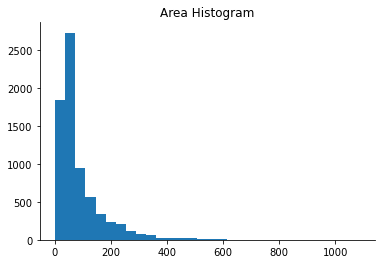

In [7]:
# Area
df['area'].hist(grid=False, bins=30)
plt.title('Area Histogram')
sns.despine()

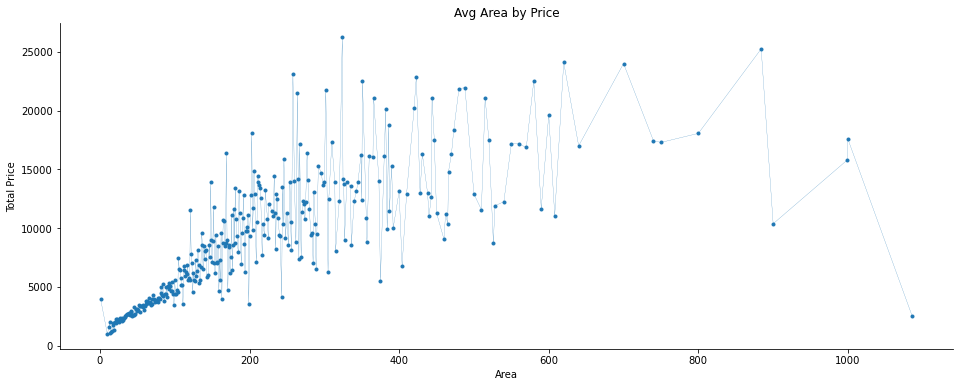

In [8]:
df.groupby(by='area')['total'].mean().plot(marker='o', markersize=3, linewidth=.2, figsize=(16,6))
plt.title('Avg Area by Price')
plt.xlabel('Area')
plt.ylabel('Total Price')
sns.despine()

Area and total price looks very correlated, specially where most of data is located (before 200m²). We can expect a very high correlation value and, maybe, a good price prediction by just using this feature.

I am also going to remove all houses with an area above of 600 because its quantity is pretty irrelevant.

In [9]:
df.drop(df[df.area >= 600].index, inplace=True)

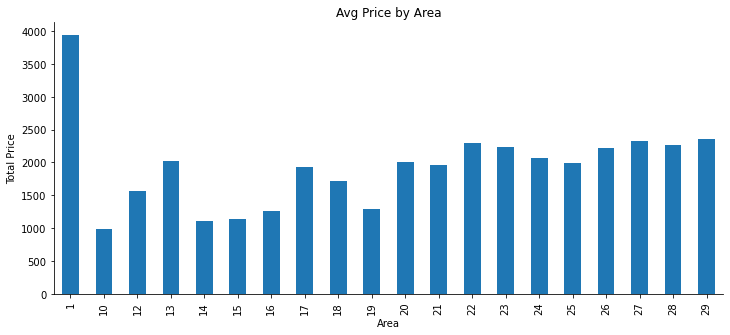

In [10]:
aux = df[df.area < 30]
aux.groupby(by='area')['total'].mean().plot(kind='bar', figsize=(12,5))
plt.title('Avg Price by Area')
plt.xlabel('Area')
plt.ylabel('Total Price')
sns.despine()

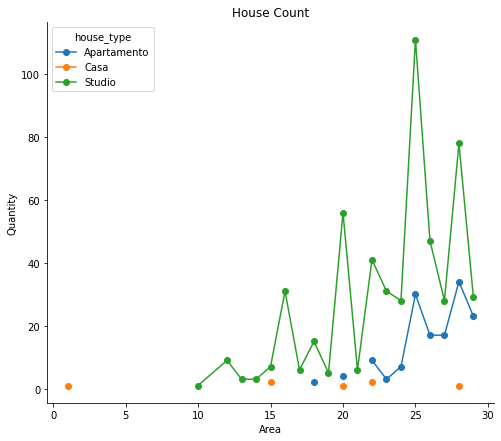

In [11]:
aux = df[df.area < 30]
aux.groupby(by=['area', 'house_type']).count()['total'].unstack().plot(kind='line', marker='o', figsize=(8,7))
plt.title('House Count')
plt.xlabel('Area')
plt.ylabel('Quantity')
sns.despine()

Analysing the small area houses (<30m²) it's noticeable that those are almost all "kitnets". Nothing unsual in here except for te 1m², this will be removed.

In [12]:
df.drop(df[df.area == 1].index, inplace=True)

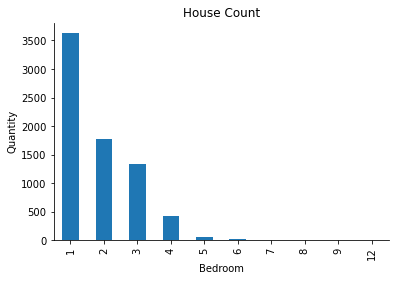

In [13]:
# Bedroom
df.bedroom.value_counts().plot(kind='bar')
plt.title('House Count')
plt.xlabel('Bedroom')
plt.ylabel('Quantity')
sns.despine()

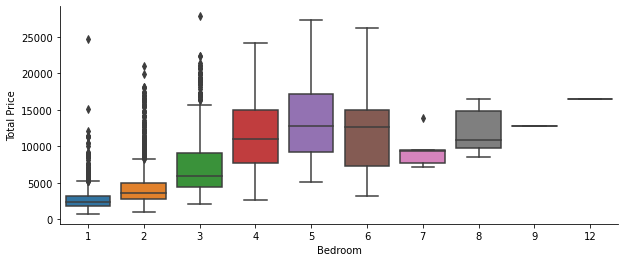

In [14]:
plt.figure(figsize=(10,4))
sns.boxplot(x='bedroom', y='total', data=df)
plt.xlabel('Bedroom')
plt.ylabel('Total Price')
sns.despine()

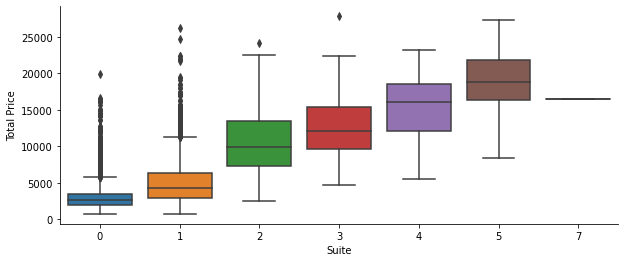

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(x='suite', y='total', data=df)
plt.xlabel('Suite')
plt.ylabel('Total Price')
sns.despine()

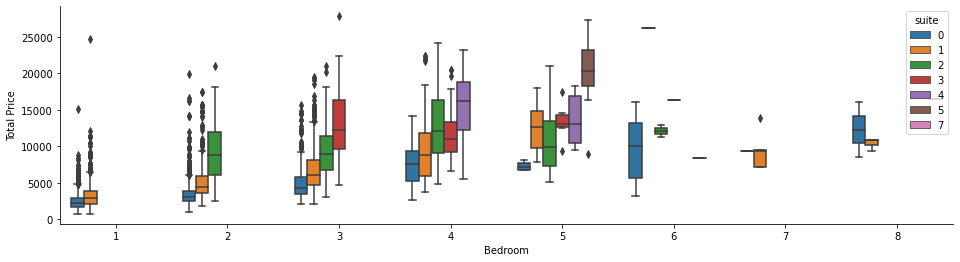

In [16]:
plt.figure(figsize=(16,4))
sns.boxplot(x='bedroom', y='total', hue='suite', data=df[df.bedroom <= 8])
plt.legend(loc='upper right', title='suite')
plt.xlabel('Bedroom')
plt.ylabel('Total Price')
sns.despine()

As expected, the house gets more expensive as the number os bedrooms increase. We can also see that "suites" make it even more expensive. That is, for the same number of bedrooms, if we have more suites, we have bigger prices

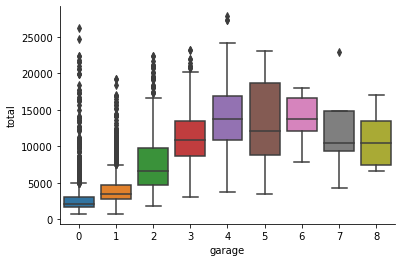

In [17]:
# Garage
sns.boxplot(x='garage', y='total', data=df)
sns.despine()

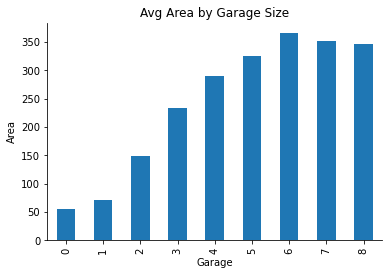

In [18]:
df.groupby(by='garage')['area'].mean().plot(kind='bar')
plt.title('Avg Area by Garage Size')
plt.xlabel('Garage')
plt.ylabel('Area')
sns.despine()

Bigger houses have bigger garage sizes. This makes them more expensive.

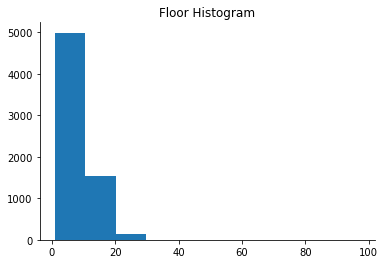

In [19]:
# Floor
df.floor.hist(grid=False)
plt.title('Floor Histogram')
sns.despine()

A quick search online showed that the highest build in SaoPaulo has 50 floors. Just for precaution I am removing everything >30.

In [20]:
df.drop(df[df.floor > 30].index, inplace=True)

In [21]:
## Checking Null Values
aux1 = df[df.floor.isnull()].house_type.value_counts().to_frame()
aux2 = df.house_type.value_counts().to_frame()
aux1.div(aux2)

,house_type
Apartamento,0.018950
Casa,0.980998
Studio,0.030204


In [22]:
def group_floor(x):
    if x <=5: return '0-5'
    elif x>5 and x<=10: return '6-10'
    elif x>10 and x<=15: return '11-15'
    elif x>15 and x<=20: return '16-20'
    elif x>20: return '20+'
    else: return '-'

In [23]:
df['floor_grouped'] = df.floor.apply(group_floor)

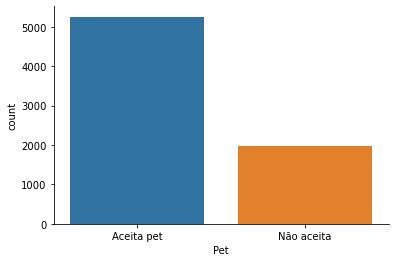

In [24]:
# Pet
sns.countplot(df['Pet'])
sns.despine()

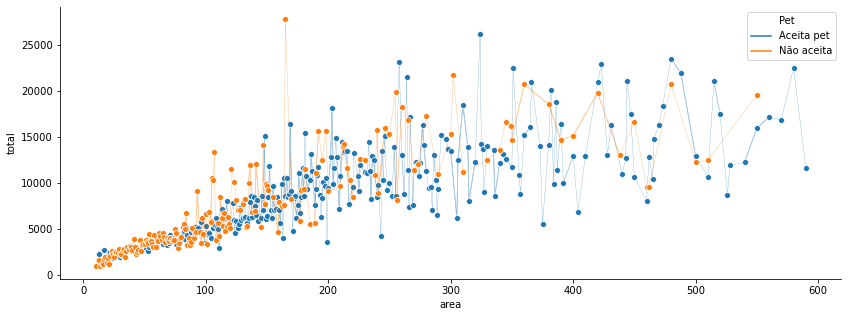

In [25]:
plt.figure(figsize=(14,5))
sns.lineplot(x='area', y='total', hue='Pet',
             marker='o', linewidth=.2,
             ci=False, data=df)
sns.despine()

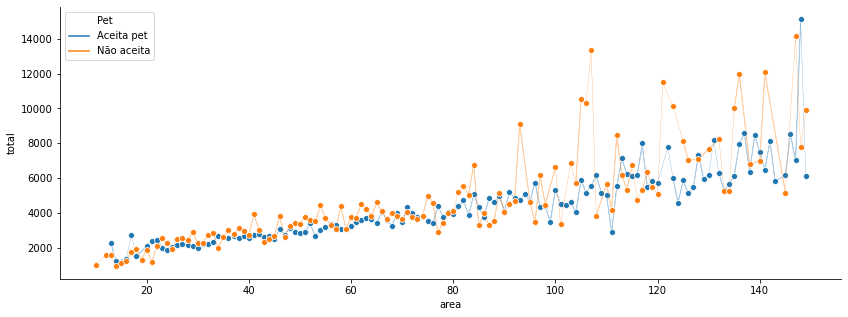

In [26]:
plt.figure(figsize=(14,5))
sns.lineplot(x='area', y='total', hue='Pet',
             marker='o', linewidth=.2,
             ci=False, data=df[df.area < 150])
sns.despine()

The above graphs shows that most of the bigger houses (>150m²) tend to be more pet friendly.
When looking closely to houses <150, where both classes are more well balanced, it seems that this
feature doesn't seems to make any differente at the final price.

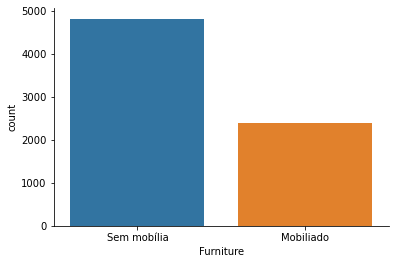

In [27]:
# Furniture
sns.countplot(df['Furniture'])
sns.despine()

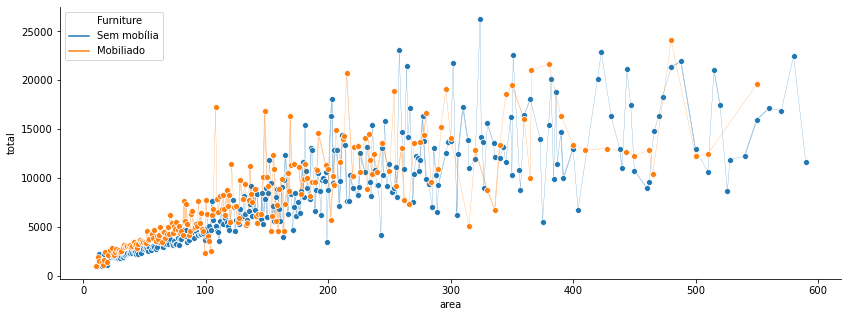

In [28]:
plt.figure(figsize=(14,5))
sns.lineplot(x='area', y='total', hue='Furniture',
             marker='o', linewidth=.2,
             ci=False, data=df)
sns.despine()

Not surprisingly, for the same house area, having furniture makes the total rent price higher.

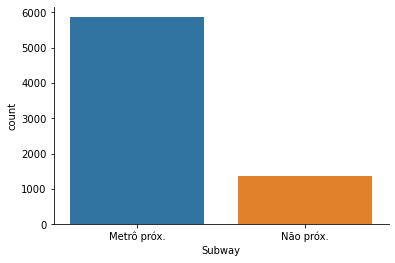

In [29]:
# Subway
sns.countplot(df['Subway'])
sns.despine()

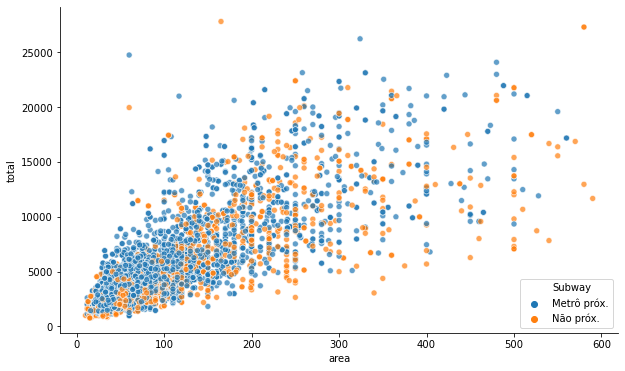

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='area', y='total', hue='Subway', alpha=.7, data=df)
sns.despine()

Seems like having a subway near by tends to make the price higher

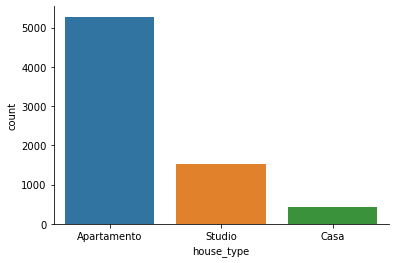

In [31]:
# House Type
sns.countplot(df['house_type'])
sns.despine()

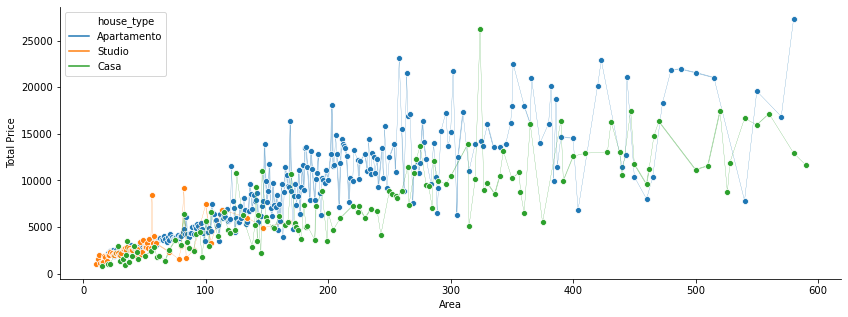

In [32]:
plt.figure(figsize=(14,5))
sns.lineplot(x='area', y='total', hue='house_type',
             marker='o', linewidth=.2,
             ci=False, data=df)
plt.xlabel('Area')
plt.ylabel('Total Price')
sns.despine()

For our model building its obvious that house type makes a huge important to determine the final price. Houses tend to be cheapier than Apartments and Studios as they have no condominium

<AxesSubplot:>

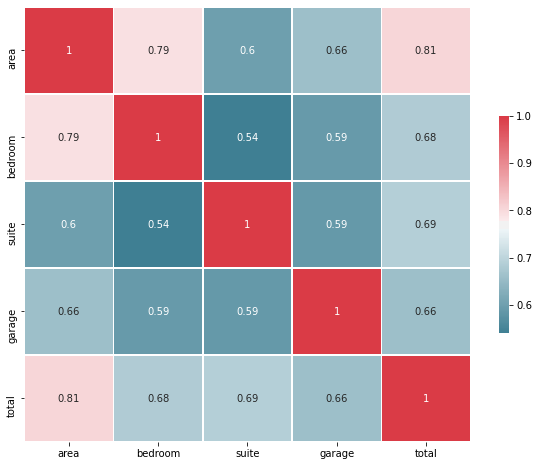

In [33]:
corr = df[['area', 'bedroom', 'suite', 'garage', 'total']].corr()
plt.figure(figsize=(10,8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [35]:
# Exporting CSV
df[['Pet', 'Furniture', 'Subway', 'house_type', 'district', 'area', \
    'bedroom', 'suite', 'garage', 'total', 'floor_grouped']].to_csv('quintoandar_eda_data.csv', index=False)